# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 500
d = 10
ads_selected=[]
numbers_of_selections = [0] * d
sum_of_reward = [0] * d
total_rewards = 0

for n in range(0,N):
  ad=0
  max_upper_bound = 0
  for i in range(0,d):

    if (numbers_of_selections[i] > 0):
      average_reward = sum_of_reward[i]/numbers_of_selections[i]
      delta_i=math.sqrt((3*math.log(n+1))/(2*numbers_of_selections[i]))
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400

    if (upper_bound > max_upper_bound):
       max_upper_bound = upper_bound
       ad = i

  ads_selected.append(ad)
  numbers_of_selections[ad] +=1
  reward = dataset.values[n , ad]
  sum_of_reward[ad] = sum_of_reward[ad] + reward
  total_rewards += reward



## Visualising the results

<function matplotlib.pyplot.show(close=None, block=None)>

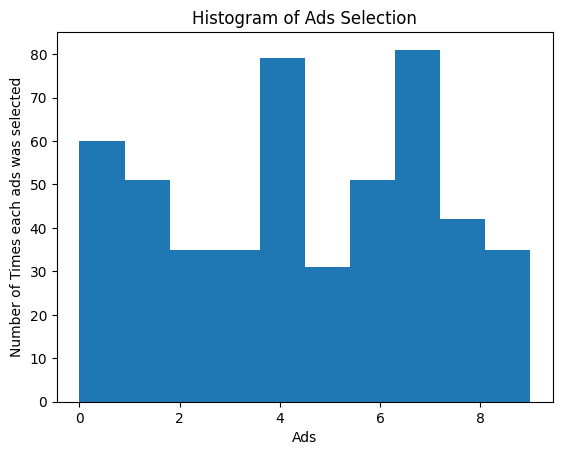

In [4]:
plt.hist(ads_selected)
plt.xlabel("Ads")
plt.ylabel("Number of Times each ads was selected")
plt.title("Histogram of Ads Selection")
plt.show